Exercise 1

In [1]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
N = 100*(6+6)
data = dict(N = N)
model_1=CmdStanModel(stan_file='code_1.stan')
model_2=CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
sim1=model_1.sample(
   data=data,
   iter_sampling=1,
   iter_warmup=0,
   chains=1,
   fixed_param=True,
   seed=24072000,
)

sim2=model_2.sample(
   data=data,
   iter_sampling=1,
   iter_warmup=0,
   chains=1,
   fixed_param=True,
   seed=24072000,
)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Exercise 2

In [12]:
model_3=CmdStanModel(stan_file='code_3.stan')
model_4=CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [14]:
data = dict(N = N, y = sim1.draws_pd().loc[0,'y[1]':f"y[{N}]"].values)
sim3=model_3.sample(
   data=data,
   iter_sampling=1,
   iter_warmup=0,
   chains=1,
   fixed_param=True,
   seed=24072000,
)

data = dict(N = N, y = sim2.draws_pd().loc[0,'y[1]':f"y[{N}]"].values)
sim4=model_4.sample(
   data=data,
   iter_sampling=1,
   iter_warmup=0,
   chains=1,
   fixed_param=True,
   seed=24072000,
)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [16]:
fit_1 = az.from_cmdstanpy(posterior=sim3)
fit_2 = az.from_cmdstanpy(posterior=sim4)

In [22]:
waic_comparison = az.compare({"model_normal": fit_1, "model_chi": fit_2}, ic="waic", scale="deviance")

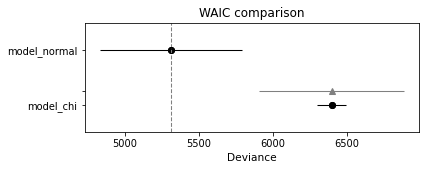

In [23]:
az.plot_compare(waic_comparison)
plt.title("WAIC comparison")
plt.show()

In [24]:
loo_comparison = az.compare({"model_normal": fit_1, "model_chi": fit_2}, ic="loo", scale="deviance")


IndexError: Encountered error in ic computation of compare.

In [27]:
model_5 = CmdStanModel(stan_file="code_5.stan")

res = []
for i in range(1, 4):
    data = dict(
        N = N,
        K = i,
        y = sim2.draws_pd().loc[0,f"y[1]":f"y[{N}]"].values,
        X = sim2.draws_pd().loc[:, 'X[1,1]':f'X[{N},{i}]'].values.reshape((N,i))
    )
    sample=model_5.sample(
            data=data,
            iter_sampling=1000,
            iter_warmup=0,
            chains=1,
            fixed_param=True,
            seed=24072000,
            refresh=1000
            )
    res.append(sample)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [31]:
loo_comparison = az.compare({"model_1": results[0], "model_2": results[1], "model_3": results[2]}, ic="loo", scale="deviance")
waic_comparison = az.compare({"model_1": results[0], "model_2": results[1], "model_3": results[2]}, ic="waic", scale="deviance")

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

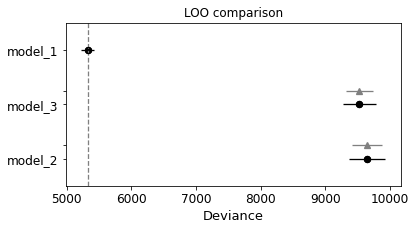

In [30]:
az.plot_compare(loo_comparison)
plt.title("LOO comparison")
plt.show()

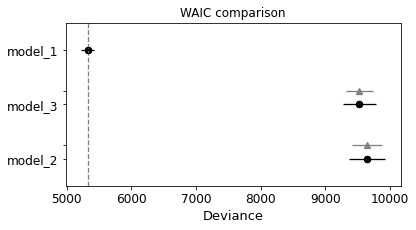

In [32]:
az.plot_compare(waic_comparison)
plt.title("WAIC comparison")
plt.show()